# implementing the perceptron

In [88]:
import numpy as np

In [89]:
class Perceptron:
    """
    Paramaters
    -----------
    epochs : int
        number of iterations
    eta : int
        learning rate
    randome state : int
        seed for random number generator

    Attributes
    -----------
    weights_ : array
    bias_ : int
    errors_ : list
        number of misclassification in each epoch
    """
    def __init__(self, eta=0.01, epochs=50, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state
    
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.weights_ = rgen.normal(loc=0.0,size=X.shape[1],scale=0.01)
        self.bias_ = np.float_(0.)
        self.errors_ = []
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.weights_ += update * xi
                self.bias_ += update
                #print(target)
                errors += int(update != 0.0)
            self.errors_.append(errors)
            #print(self.errors_)
        return self

    def net_input(self,X):
        "return z in for sigma(z)= wx + b"
        return np.dot(X, self.weights_) + self.bias_
        
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1,0)

# testing the perceptron

In [90]:
# X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# y = np.array([0, 1, 1, 0])
# p = Perceptron(eta=0.01,epochs=100)
# p.fit(X,y)

# print("Weights: ",p.weights_)
# print("Bias: ",p.bias_)

# using the perceptron with the iris data

In [91]:
import pandas as pd

In [92]:
iris_data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(iris_data_link, header=None, encoding="utf-8")

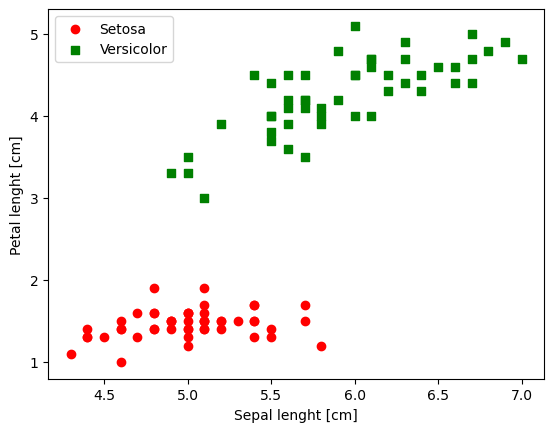

In [93]:
#ploting data

import matplotlib.pyplot as plt

y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100,[0,2]].values

plt.scatter(X[:50,0],X[:50,1],color="red",marker="o",label="Setosa")
plt.scatter(X[50:100,0],X[50:100,1],color="green",marker="s",label='Versicolor')
plt.xlabel("Sepal lenght [cm]")
plt.ylabel("Petal lenght [cm]")
plt.legend(loc="upper left")
plt.show()

In [94]:
#classification of the iris flowers to either Setosa or versicolor

# extracting and turning examples to numerical values: 0 for Iris-Setosa and 1 for Iris-Versicolor
y = df.iloc[0:100,4].values
y = np.where(y == "Iris-setosa", 0,1)

# extracting features only Petal and Sepal lengths (0 and 2 columns in the iris data)
X = df.iloc[0:100,[0,2]].values

#initializing the perceptron instance
iris_p = Perceptron(eta=0.1, epochs=10)
print(y)
# fitting 
iris_p.fit(X,y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


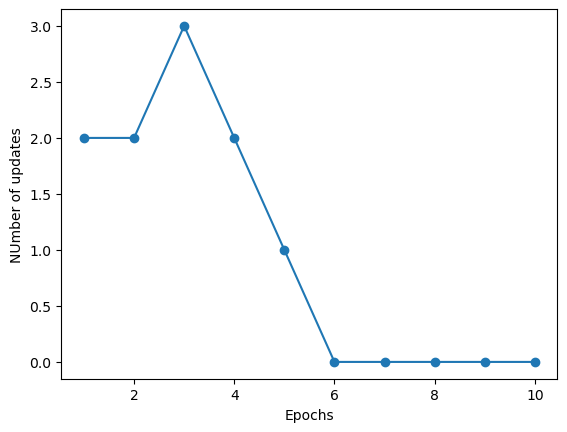

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]


In [95]:
# ploting the misclassification error in each epoch
plt.plot(range(1, len(iris_p.errors_) + 1), iris_p.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("NUmber of updates")
plt.show()
print(iris_p.errors_)